<a href="https://colab.research.google.com/github/Vijayaranagn/Projects/blob/main/911_Call_analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/911.csv")

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [ ]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [ ]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [ ]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

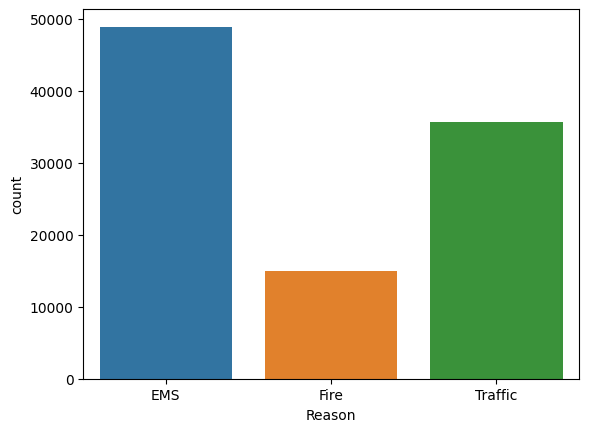

In [ ]:
sns.countplot(x='Reason', data=df)

In [ ]:
type(df['timeStamp'][0])

str

In [ ]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [ ]:
df['Month'] = df['timeStamp'].apply(lambda x : x.month)

In [ ]:
df['Dayofweek'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [ ]:
dmap = {0:'Mon', 1 : 'Tue', 2 : 'Wed', 3 : 'Thu', 5 : 'Fri', 6:'Sat', 6 : 'Sun'}

In [ ]:
df['Dayofweek'].map(dmap)

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Dayofweek, Length: 99492, dtype: object

<Axes: xlabel='Dayofweek', ylabel='count'>

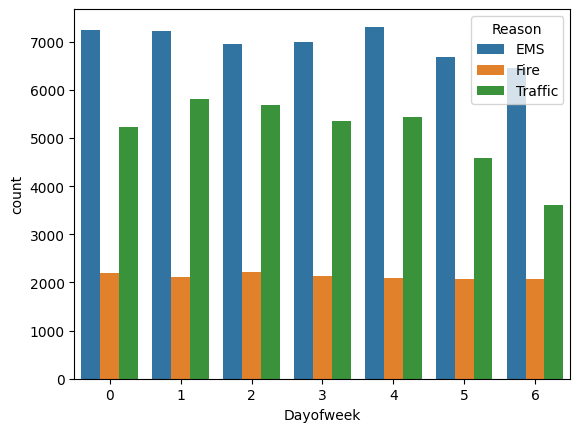

In [ ]:
sns.countplot(x='Dayofweek', hue = 'Reason', data = df)

<Axes: xlabel='Month', ylabel='count'>

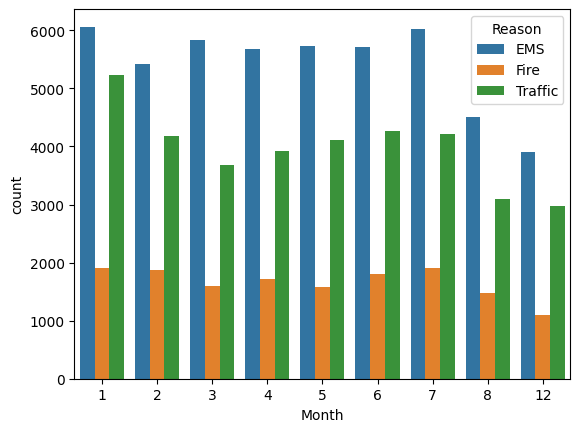

In [ ]:
sns.countplot(x='Month', hue = 'Reason', data = df)

In [ ]:
bymonth = df.groupby('Month').count()

In [ ]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek,Day
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<Axes: xlabel='Month'>

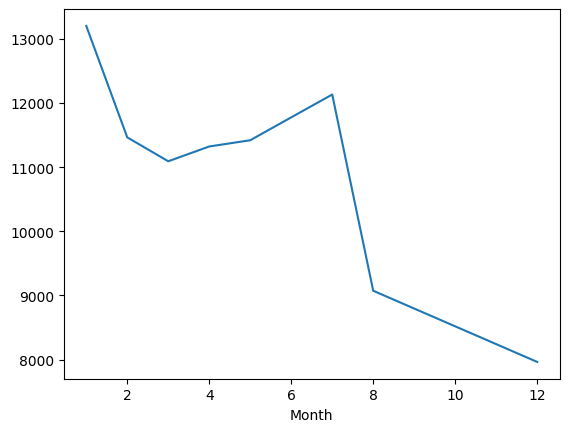

In [ ]:
bymonth['twp'].plot()

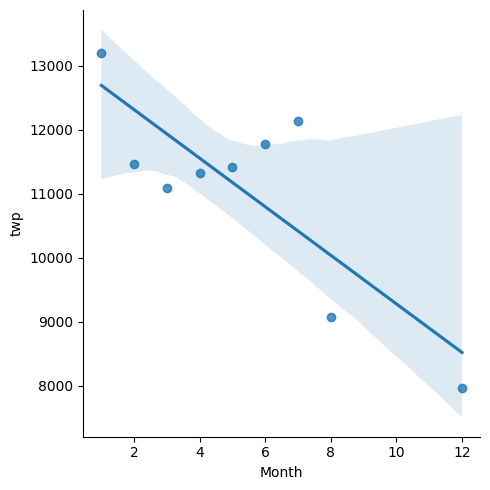

In [ ]:
sns.lmplot(x='Month', y='twp', data=bymonth.reset_index())

In [ ]:
df.groupby('Date').count()['twp']

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: twp, Length: 259, dtype: int64

In [ ]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

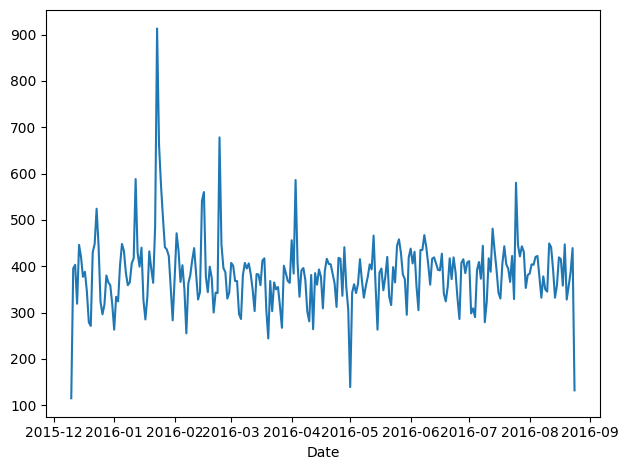

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

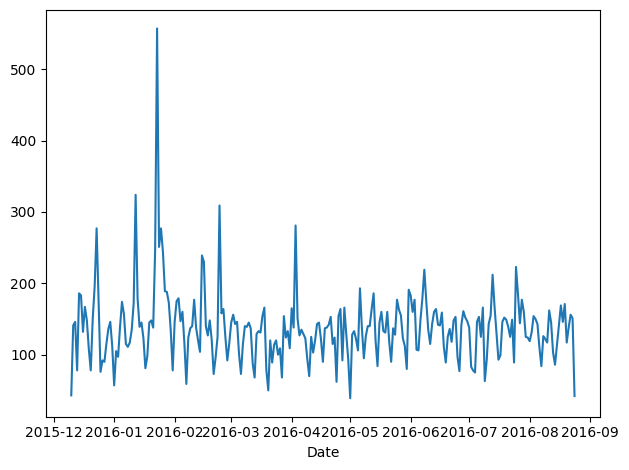

In [ ]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()